# Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
import re

# Avoid too many decimal places on Pandas output
pd.set_option('display.float_format', lambda x: '%.5f' % x)

# Auxiliary functions

In [2]:
def print_correlations(df):
    rho = df.corr()
    pval = df.corr(method=lambda x, y: pearsonr(x, y)[1]) - np.eye(*rho.shape)
    p = pval.applymap(lambda x: ''.join(['*' for t in [.05, .01, .001] if x<=t]))
    print(rho.round(2).astype(str) + p)
    
def plot_correlations(df): 
    corr = df.corr()
    fig = plt.figure()
    ax = fig.add_subplot(111)
    cax = ax.matshow(corr, cmap='coolwarm', vmin=-1, vmax=1)
    fig.colorbar(cax)
    ticks = np.arange(0, len(df.columns), 1)
    ax.set_xticks(ticks)
    plt.xticks(rotation=90)
    ax.set_yticks(ticks)
    ax.set_xticklabels(df.columns)
    ax.set_yticklabels(df.columns)
    plt.show()

# Load data

In [3]:
evaluation_path = './experiments/evaluation_error_stable.csv'

# Remove special characters output if they are present
string = open(evaluation_path).read()
new_str = re.sub('\[m', '', string)
open(evaluation_path, 'w').write(new_str)

29959

In [4]:
df = pd.read_csv(evaluation_path)

# Remove columns unnecessary for the analysis
df2 = df.drop(columns=['model', 'smooth_v', 'inner', 'run'])
df2.head()

,mean_error,last_error,n-links,alpha,inner_epsilon,rehu
0,13223.76774,16382.97897,8,0.00010,0.20000,0.0005
1,43904.14910,83817.34390,8,0.00010,0.01000,0.0005
2,6863.59554,10042.53480,8,0.00010,0.00500,0.0005
3,9318.50523,21328.84341,8,0.00010,0.00100,0.0005
4,2671.31691,3360.66257,8,0.00010,0.00050,0.0005


# Evaluation analysis

## Mean error by hyperparameters configuration

In [9]:
df2.groupby(by=['n-links', 'alpha', 'inner_epsilon', 'rehu']) \
    .agg(mean_error=('mean_error', 'mean'), runs_count=('last_error', 'size')) \
    .sort_values(by=['n-links', 'mean_error'])

mean_error  runs_count
n-links alpha   inner_epsilon rehu                              
1       0.00010 0.01000       0.001}        51.98827           1
                0.00500       0.005}        57.18592           1
                0.00100       0.0005}       59.54881           1
        0.00100 0.00500       0.0005}       62.48275           1
        0.00010 0.01000       0.005}        66.14884           1
        0.00100 0.00500       0.001}        67.41795           1
        0.00010 0.00100       0.001}        70.24684           1
                0.00500       0.0005}       74.25450           1
        0.00100 0.00100       0.001}        79.43387           1
                0.01000       0.0005}       79.66589           2
                              0.001}        93.92825           2
        0.00010 0.01000       0.0005}      117.88084           1
        0.00100 0.01000       0.005}       122.01170           2
                0.00500       0.005}       230.69010           1
        0.00010 0.00100       0.005}       273.29151           1
                0.00500       0.001}       328.59394           1
        0.00100 0.00100       0.005}       356.07036           1
                              0.0005}      393.15307           1
2       0.00005 0.20000       0.0005      5901.24338           5
        0.00010 0.00050       0.0005      6115.86219           5
                0.00010       0.0005      8116.96515           5
        0.00005 0.00050       0.0005      8876.59616           5
        0.00010 0.20000       0.0005      9286.64429           5
                0.10000       0.005       9963.84236           8
                0.05000       0.005      11517.57052           8
                0.01000       0.0005     13113.35350           5
        0.00005 0.00500       0.0005     15924.70978           5
                0.01000       0.0005     24856.59456           5
        0.00010 0.00100       0.0005     25526.02316           5
                0.00500       0.0005     28446.90664           5
                0.01000       0.005      32630.54588           8
        0.00005 0.00100       0.0005     35358.09668           5
                0.00010       0.0005     52416.78325           5
8       0.00005 0.20000       0.0005      5902.54047          15
        0.00010 0.20000       0.0005      8088.16350          15
        0.00005 0.01000       0.0005     11689.66608          15
                0.00100       0.0005     12996.22103          15
        0.00010 0.01000       0.0005     14320.92214          15
        0.00005 0.00500       0.0005     20662.60996          15
        0.00010 0.00500       0.0005     29573.60950          15
                0.10000       0.005      35378.90579          15
                0.05000       0.005      42888.96656          15
                0.01000       0.005     214454.04534          15
                0.00100       0.0005    315114.56173          15
        0.00005 0.00010       0.0005    432107.63205          15
                0.00050       0.0005   2672059.72576          15
        0.00010 0.00050       0.0005   7298058.82296          15
                0.00010       0.0005  33086092.11623          15

## Minimum mean_error by hyperparameter configuration

In [6]:
df_min = df2.groupby(by=['n-links', 'alpha', 'inner_epsilon', 'rehu']).min().sort_values(by=['mean_error'])
df_min

mean_error  last_error
n-links alpha   inner_epsilon rehu                           
1       0.00010 0.01000       0.001}     51.98827     6.75878
                0.00500       0.005}     57.18592     6.54586
                0.00100       0.0005}    59.54881     7.10675
        0.00100 0.00500       0.0005}    62.48275     6.62229
        0.00010 0.01000       0.005}     66.14884     6.35102
        0.00100 0.01000       0.0005}    66.48069     6.36546
                0.00500       0.001}     67.41795     6.51148
        0.00010 0.00100       0.001}     70.24684     6.68460
        0.00100 0.01000       0.005}     70.32577     6.38740
        0.00010 0.00500       0.0005}    74.25450    12.65100
        0.00100 0.00100       0.001}     79.43387    13.48053
                0.01000       0.001}     79.55216    14.70927
2       0.00010 0.01000       0.0005    112.44081    24.20345
1       0.00010 0.01000       0.0005}   117.88084    39.14425
2       0.00005 0.01000       0.0005    125.57936    38.00225
                0.00050       0.0005    155.72550    67.23885
        0.00010 0.05000       0.005     159.64444    72.43086
                0.00010       0.0005    225.51472    20.63603
1       0.00100 0.00500       0.005}    230.69010   178.40083
2       0.00010 0.00500       0.0005    270.65768    33.84720
1       0.00010 0.00100       0.005}    273.29151   230.06686
2       0.00010 0.00050       0.0005    314.60934   225.04498
1       0.00010 0.00500       0.001}    328.59394   326.92049
        0.00100 0.00100       0.005}    356.07036   322.54243
                              0.0005}   393.15307   429.41525
2       0.00010 0.10000       0.005     570.91762   529.06966
                0.01000       0.005     576.31256   534.24779
        0.00005 0.20000       0.0005    838.00009   995.33835
                0.00500       0.0005   1115.72930  1443.41769
8       0.00010 0.00050       0.0005   1300.74034   858.07791
2       0.00010 0.20000       0.0005   1385.09984  1985.81727
8       0.00010 0.20000       0.0005   1456.92780  1059.32405
        0.00005 0.00100       0.0005   1533.90462  1088.04334
        0.00010 0.00010       0.0005   1605.06509  1313.61618
        0.00005 0.00500       0.0005   1814.79581  1387.84812
                0.01000       0.0005   2033.51450  2335.75241
                0.20000       0.0005   2122.60547  1908.77136
        0.00010 0.01000       0.0005   2617.99448  2434.38837
                0.00100       0.0005   3235.50709  3531.66039
        0.00005 0.00010       0.0005   3259.52558  3280.62062
        0.00010 0.00500       0.0005   3547.99575  3968.71476
        0.00005 0.00050       0.0005   3816.31139  5063.18212
2       0.00005 0.00100       0.0005   3973.88991  6169.94650
        0.00010 0.00100       0.0005   4964.68282  7345.12971
8       0.00010 0.05000       0.005    6135.05866  9077.25309
2       0.00005 0.00010       0.0005   7608.13094 14897.38001
8       0.00010 0.10000       0.005    8321.69167 10727.39394
                0.01000       0.005   28397.96845 58758.39611

In [7]:
# Look at specific hyperparameter combinations
df2.query('alpha==0.00010 & inner_epsilon==0.20000')

,mean_error,last_error,n-links,alpha,inner_epsilon,rehu
0,13223.76774,16382.97897,8,0.00010,0.20000,0.0005
12,8230.96659,11182.98096,8,0.00010,0.20000,0.0005
24,9655.88796,14516.05977,8,0.00010,0.20000,0.0005
36,3752.24999,4664.11420,8,0.00010,0.20000,0.0005
48,7069.86363,11580.30266,8,0.00010,0.20000,0.0005
60,10398.40851,14432.96120,8,0.00010,0.20000,0.0005
72,8730.22950,10166.41118,8,0.00010,0.20000,0.0005
84,9447.73639,15755.51087,8,0.00010,0.20000,0.0005
96,5666.69893,8992.45538,8,0.00010,0.20000,0.0005
108,8266.51647,11742.41221,8,0.00010,0.20000,0.0005


## Correlation between variables in the dataset

In [8]:
print_correlations(df2)

ValueError: could not convert string to float: '0.001}'

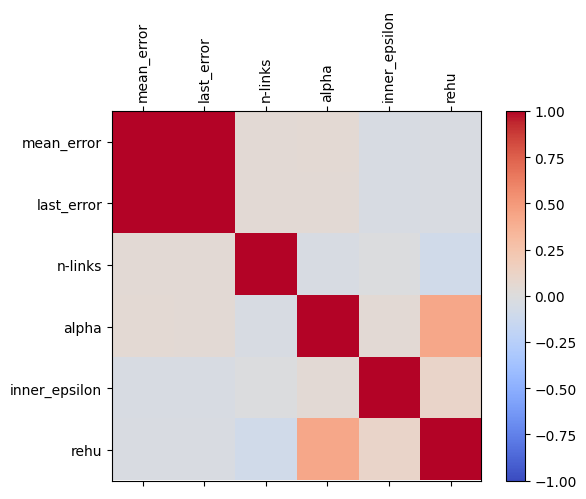

In [ ]:
plot_correlations(df2)